# k-Means Clustering

Despite its simplicity, k-Means clustering is a widely used and extremely effectively clustering algorithm that is used in a number of applications within data science.  It is particularly useful for quickly uncovering relationships in unlabeled data.

In this notebook we will explore some of the implementations of k-Means in scikit-learn using numpy and pandas, and apply it to a sample problem in customer segementation.

First, we import libraries and download data.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Demonstration

First, we generate some random data using the make_blobs library and apply the k-Means algorithm to the random data to illustrate the functioning of the algorithm and its use.

In [2]:
# Entering some data

x1 = [-4.9,-3.5,0,-4.5,-3,-1,-1.2,-4.5,-1.5,-4.5,-1,-2,-2.5,-2,-1.5,4,1.8,2,2.5,3,4,2.25,1,0,1,2.5,5,2.8,2,2]
x2 = [-3.5,-4,-3.5,-3,-2.9,-3,-2.6,-2.1,0,-0.5,-0.8,-0.8,-1.5,-1.75,-1.75,0,0.8,0.9,1,1,1,1.75,2,2.5,2.5,2.5,2.5,3,6,6.5]

In [3]:
# Function to assign datapoints to a cluster

colors_map = np.array(['b','r'])

def assign_members(x1,x2,centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points +1 -1]
    return colors, class_of_points

# Function that updates the center point of each cluster

def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return[center1, center2]

# Function to plot the points and the centroids

def plot_points(centroids = None, colors = 'g', figure_title = None):
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1)
    
    centroid_colors = ['bx','rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth = 5, markersize = 20)
    plt.scatter(x1, x2, s = 500, c = colors)
    
    xticks = np.linspace(-6,8,15, endpoint = True)
    yticks = np.linspace(-6,6,13, endpoint = True)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)
    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length = 2, width = 1, which = 'major', labelsize = 15)
    
    ax.set_xlabel('x1', fontsize = 20)
    ax.set_ylabel('x2', fontsize = 20)
    
    ax.set_title(figure_title, fontsize = 24)
    
    plt.show()

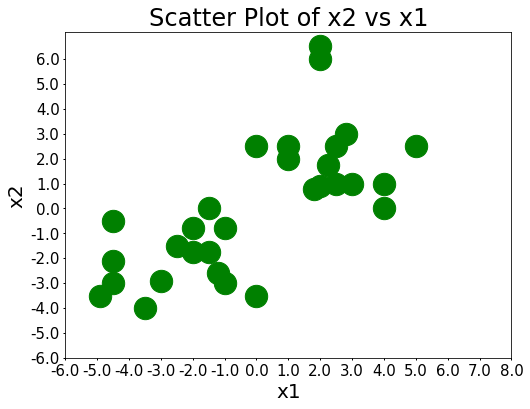

In [4]:
plot_points(figure_title = 'Scatter Plot of x2 vs x1')

### Initialize k-Means

To get k-Means going, we need to select centroid points.  We choose [-2,2] and [2,-2] as our initial centroid points.  The algorithm will then assign data points to one of two clusters based on the center point, and then update center points and reassign.  This is an iterative process and is subject to getting trapped in local minima.  As such, when doing this on real-world data we'd typically reinitialize the algorithm several times with different choices of starting center points.  The algorithm converges quickly, so there is usually minimal cost to doing so.

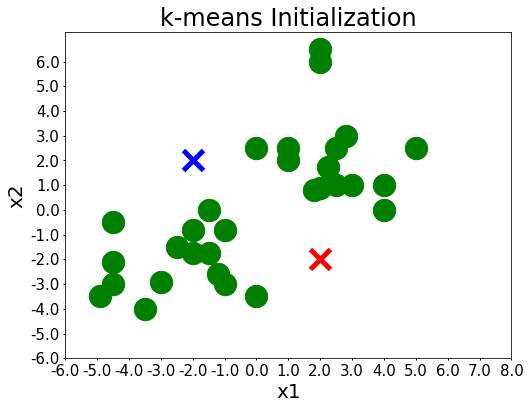

In [5]:
centers = [[-2,2],[2,-2]]
plot_points(centers, figure_title = 'k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster 


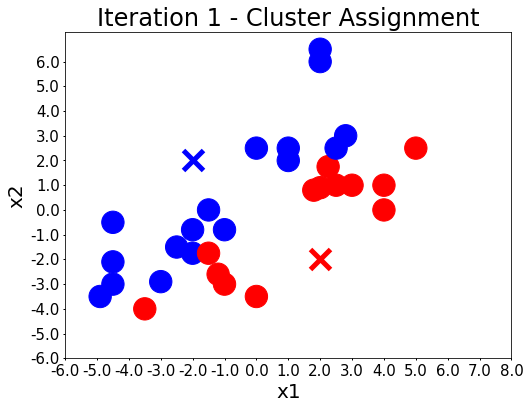

Iteration 1 - Press Enter to update the centers 


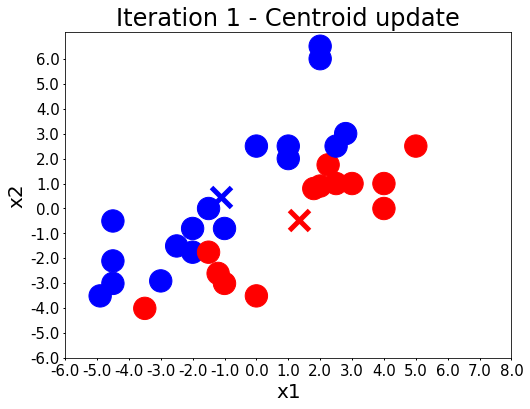

Iteration 2 - Press Enter to update the members of each cluster 


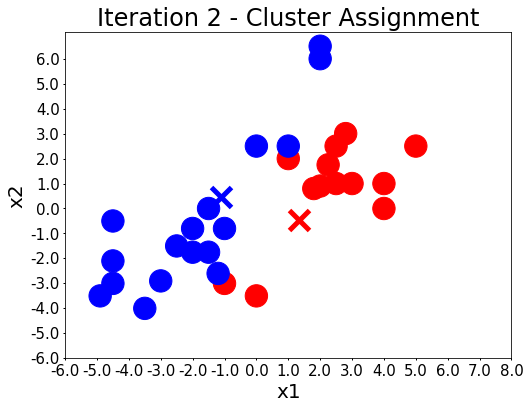

Iteration 2 - Press Enter to update the centers 


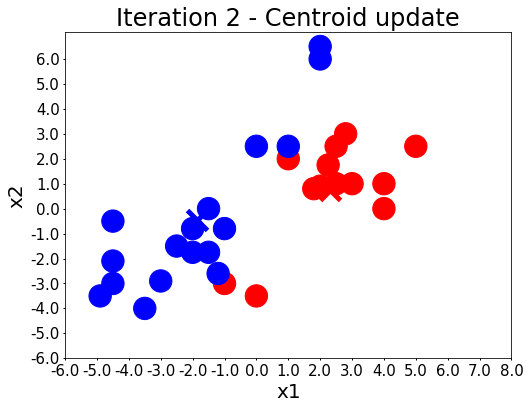

Iteration 3 - Press Enter to update the members of each cluster 


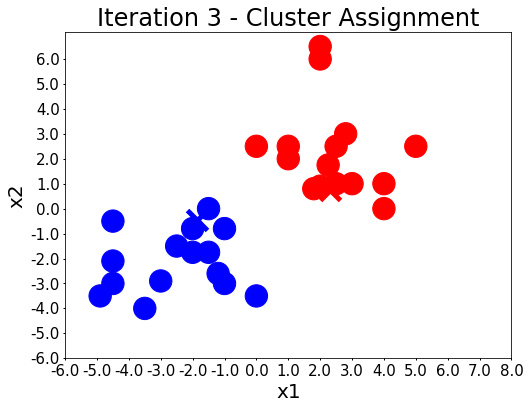

Iteration 3 - Press Enter to update the centers 


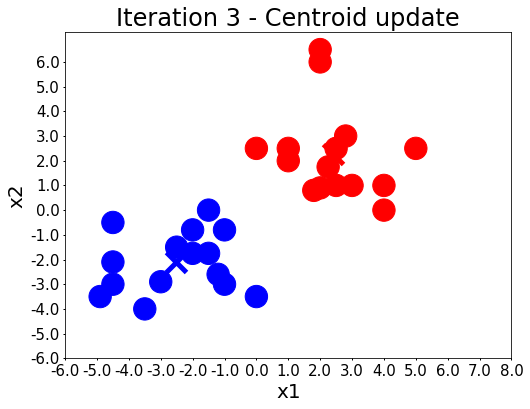

Iteration 4 - Press Enter to update the members of each cluster 


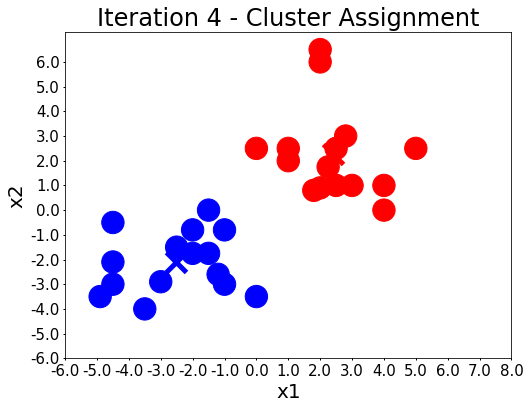

Iteration 4 - Press Enter to update the centers 


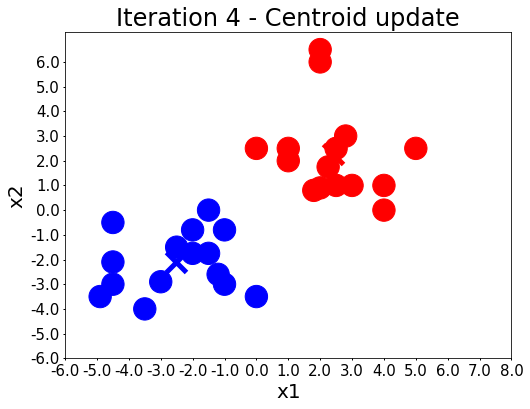

In [6]:
# Iterate the algorithm to move center points.

number_of_iterations = 4 # For this example just do 4 iterations.

for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i+1))
    colors, class_of_points = assign_members(x1,x2,centers)
    title = 'Iteration {} - Cluster Assignment'.format(i+1)
    plot_points(centers, colors, figure_title = title)
    input('Iteration {} - Press Enter to update the centers'.format(i+1))
    centers = update_centers(x1,x2,class_of_points)
    title = 'Iteration {} - Centroid update'.format(i+1)
    plot_points(centers, colors, figure_title = title)

### k-Means with More Data

The above example gives a nice visualization of how k-Means operates in terms of assigning data points to clusters and updating the center points and then iterating.  Of course, it was a very small dataset.  Now we apply k-Means with a larger dataset.


We will also using the k-Means built into scikit-learn instead of recreating the algorithm from scratch as above.  We opt for **k-means++** which is an implementation that selects the initial cluster centers and performs the clustering in a smarter way to improve the speed of the algorithm.

We'll also initialize with 4 clusters, and have the algorithm reset 12 times to avoid falling into a local extremum.

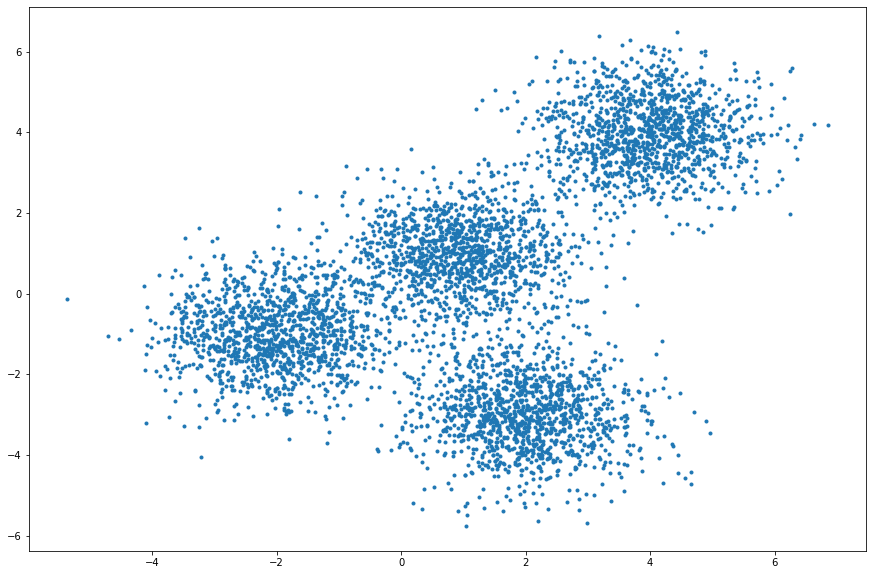

In [9]:
np.random.seed(0)
X,y = make_blobs(n_samples = 5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std = 0.9)

plt.figure(figsize = (15,10))
plt.scatter(X[:,0], X[:,1], marker = '.')

In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 0, ..., 1, 2, 2], dtype=int32)

In [12]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687],
       [-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298]])

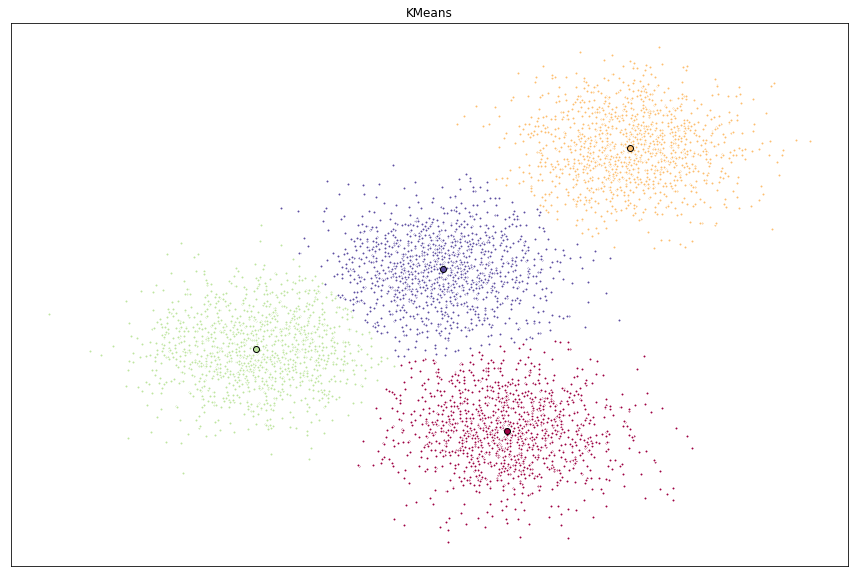

In [13]:
fig = plt.figure(figsize = (15,10))

colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))

ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[4,4],[-2,-1],[2,-3],[1,1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()